# GTI770 - Systèmes intelligents et apprentissage machine

#### Alessandro L. Koerich

### Notebook Jupyter - 7_kNN - Optdigits Dataset

##### June 2018

----
## Dataset: Optical Recognition of Handwritten Digits


* #### Relevant Information:
	We used preprocessing programs made available by NIST to extract
	normalized bitmaps of handwritten digits from a preprinted form. From
	a total of 43 people, 30 contributed to the training set and different
	13 to the test set. 32x32 bitmaps are divided into nonoverlapping 
	blocks of 4x4 and the number of on pixels are counted in each block.
	This generates an input matrix of 8x8 where each element is an 
	integer in the range 0..16. This reduces dimensionality and gives 
	invariance to small distortions.

* #### Number of Instances
	optdigits.tra	Training	3823
	optdigits.tes	Testing		1797
	
	The way we used the dataset was to use half of training for 
	actual training, one-fourth for validation and one-fourth
	for writer-dependent testing. The test set was used for 
	writer-independent testing and is the actual quality measure.

* #### Number of Attributes
	64 inputs + 1 class attribute

* #### For Each Attribute:
	All input attributes are integers in the range 0..16.
	The last attribute is the class code 0..9
    
* #### Class Distribution


	No of examples in training set
	 0.  376
	 1.  389
	 2.  380
	 3.  389
	 4.  387
	 5.  376
	 6.  377
	 7.  387
	 8.  380
	 9.  382


	No of examples in testing set
	 0.  178
	 1.  182
	 2.  177
	 3.  183
	 4.  181
	 5.  182
	 6.  181
	 7.  179
	 8.  174
	 9.  180
    
 ----

In [1]:
# Imports
import numpy as np
from sklearn import neighbors

### Load TRAIN, TEST, UNKNOWN CLASS data from files
#### Numeric inputs and outputs

In [2]:
num_features    = 64
data_train      = np.loadtxt("CSV_Files/optdigits-train.arff.csv", delimiter="," , skiprows=1)
data_test       = np.loadtxt("CSV_Files/optdigits-test.arff.csv", delimiter="," , skiprows=1)
data_unlabelled = np.loadtxt("CSV_Files/optdigits-predict-nolabels.arff.csv", delimiter="," , skiprows=1)

In [3]:
# Visualize data
data_train

array([[1.e-03, 1.e+00, 6.e+00, ..., 1.e-03, 1.e-03, 0.e+00],
       [1.e-03, 1.e-03, 1.e+01, ..., 1.e-03, 1.e-03, 0.e+00],
       [1.e-03, 1.e-03, 8.e+00, ..., 1.e-03, 1.e-03, 7.e+00],
       ...,
       [1.e-03, 1.e-03, 3.e+00, ..., 1.e-03, 1.e-03, 6.e+00],
       [1.e-03, 1.e-03, 6.e+00, ..., 5.e+00, 1.e-03, 6.e+00],
       [1.e-03, 1.e-03, 2.e+00, ..., 1.e-03, 1.e-03, 7.e+00]])

### Separate inputs (features) from outputs (labels)

In [4]:
X_train       = data_train[:,0:num_features]
Y_train       = data_train[:,num_features] # last column = class labels
X_test        = data_test[:,0:num_features]
Y_test        = data_test[:,num_features] # last column = class labels
X_unlabelled  = data_unlabelled[:,0:num_features]
# Y_unlabelled  = ??? We don't have the labels, so there is no Y_unlabelled!!

In [5]:
# Visualize inputs
X_train
# 64 columns = inputs

array([[1.0e-03, 1.0e+00, 6.0e+00, ..., 1.0e+00, 1.0e-03, 1.0e-03],
       [1.0e-03, 1.0e-03, 1.0e+01, ..., 3.0e+00, 1.0e-03, 1.0e-03],
       [1.0e-03, 1.0e-03, 8.0e+00, ..., 1.0e-03, 1.0e-03, 1.0e-03],
       ...,
       [1.0e-03, 1.0e-03, 3.0e+00, ..., 9.0e+00, 1.0e-03, 1.0e-03],
       [1.0e-03, 1.0e-03, 6.0e+00, ..., 1.6e+01, 5.0e+00, 1.0e-03],
       [1.0e-03, 1.0e-03, 2.0e+00, ..., 1.0e-03, 1.0e-03, 1.0e-03]])

In [6]:
# Visualize labels
Y_train
# last column = output = class labels

array([0., 0., 7., ..., 6., 6., 7.])

## Scikit-Learn Nearest Neighbors Documentation

* http://scikit-learn.org/stable/modules/neighbors.htm

* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

#### You may decide on the distance metric:
##### http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
    
* “euclidean”	EuclideanDistance	

* “manhattan”	ManhattanDistance	

* “chebyshev”	ChebyshevDistance	

* “minkowski”	MinkowskiDistance

* “wminkowski” WMinkowskiDistance

* “seuclidean” SEuclideanDistance

* “mahalanobis” MahalanobisDistance

* “haversine”	HaversineDistance

* “hamming”	HammingDistance

* “canberra”	CanberraDistance

* “braycurtis”	BrayCurtisDistance

* “jaccard”	JaccardDistance

* “matching”	MatchingDistance

* “dice”	DiceDistance

* “kulsinski”	KulsinskiDistance

* “rogerstanimoto”	RogersTanimotoDistance

* “russellrao”	RussellRaoDistance

* “sokalmichener”	SokalMichenerDistance

* “sokalsneath”	SokalSneathDistance

### We create an instance of Neighbours Classifier and train it with the training dataset.

In [9]:
n_neighbors = 3
weights     = 'uniform'
metric      = 'euclidean'
algorithm   = 'brute'

model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm=algorithm, metric=metric )
model = model.fit(X_train, Y_train)

In [10]:
# Show all parameters of the model Normal model
# You can change all these parameters
# See the documentation
model

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Y_train_pred = model.predict(X_train)
Y_train_pred

array([0., 0., 7., ..., 6., 6., 7.])

In [12]:
# You can also predict the probability of each class
# train dataset
Y_train_pred_prob = model.predict_proba(X_train)
Y_train_pred_prob

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
acc_digits_data = accuracy_score(Y_train, Y_train_pred )
print("Correct classification rate for the training dataset = "+str(acc_digits_data*100)+"%")

Correct classification rate for the training dataset = 99.26759089720115%


In [15]:
from sklearn.metrics import classification_report

In [16]:
target_names = ['0','1','2','3','4','5','6','7','8','9']
print( classification_report(Y_train, Y_train_pred, target_names=target_names))
# This works, but we have labels with no predicted samples

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       376
           1       0.97      0.99      0.98       389
           2       1.00      1.00      1.00       380
           3       0.99      0.99      0.99       389
           4       0.99      0.99      0.99       387
           5       1.00      0.99      0.99       376
           6       0.99      0.99      0.99       377
           7       0.99      0.99      0.99       387
           8       0.99      0.98      0.99       380
           9       0.99      0.99      0.99       382

   micro avg       0.99      0.99      0.99      3823
   macro avg       0.99      0.99      0.99      3823
weighted avg       0.99      0.99      0.99      3823



In [17]:
cm_digits_data = confusion_matrix(Y_train, Y_train_pred )
cm_digits_data

array([[374,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0, 387,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 380,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 386,   0,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0, 385,   0,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0, 373,   0,   0,   0,   2],
       [  0,   2,   0,   0,   0,   0, 375,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0, 385,   0,   0],
       [  0,   6,   0,   0,   0,   0,   0,   0, 373,   1],
       [  0,   0,   0,   1,   1,   0,   0,   2,   1, 377]])

In [18]:
import itertools
import matplotlib.pyplot as plt

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
np.set_printoptions(precision=2)

In [21]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_digits_data,
                      classes = ['0','1','2','3','4','5','6','7','8','9'],
                      title = 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[374   0   0   0   1   0   1   0   0   0]
 [  0 387   1   0   0   0   0   1   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   1   0 386   0   1   0   0   1   0]
 [  0   0   0   0 385   0   1   1   0   0]
 [  0   1   0   0   0 373   0   0   0   2]
 [  0   2   0   0   0   0 375   0   0   0]
 [  0   0   0   1   1   0   0 385   0   0]
 [  0   6   0   0   0   0   0   0 373   1]
 [  0   0   0   1   1   0   0   2   1 377]]


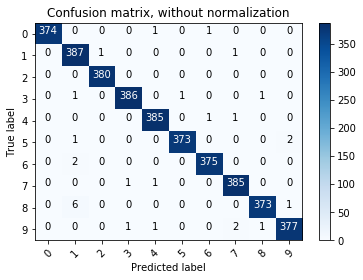

In [22]:
plt.show()

In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_digits_data,
                      classes = ['0','1','2','3','4','5','6','7','8','9'],
                      normalize = True,
                      title='Confusion matrix, with normalization')

Normalized confusion matrix
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.01]
 [0.   0.01 0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]
 [0.   0.02 0.   0.   0.   0.   0.   0.   0.98 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]]


In [ ]:
plt.show()

## TRAINING and TESTING on the same dataset does not give us a fair evaluation of the model

#### Therefore, to make a fair evaluation, we need to slipt our dataset into TRAIN and VALID partitions, or use another way...

#### 1) HOLD-OUT: hold out part of the available data as a validation (or test) set

#### 2) k-FOLD CROSS VALIDATION (CV): In k-fold CV, the training set is split into k smaller sets and for each of the k “folds”:
        
   * A model is trained using k-1 of the folds as training data;
        
   * The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
        
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

#### 3) LeaveOneOut Cross Validation (LOOCV): each learning set is created by taking all the samples except one, the test set being the sample left out.
   * Thus, for n samples, we have n different training sets and n different tests set.

---
### 1) HOLD-OUT
---

In [24]:
# Using hold-out evaluation
from sklearn.model_selection import train_test_split

In [25]:
# The data is already split into train and valid/test...
# So, we don't need to use the "train_test_split"
# X_train, X_valid, Y_train, Y_valid = train_test_split( X_data, Y_data, test_size=0.4, random_state=0, shuffle=True,
#                                                     stratify=Y_data)

In [26]:
# Evaluating the test dataset 
Y_test_pred      = model.predict(X_test)
Y_test_pred_prob = model.predict_proba(X_test)
acc_digits_test  = accuracy_score(Y_test, Y_test_pred )
print("Correct classification rate for the test dataset = "+str(acc_digits_test*100)+"% on "+str(Y_test.shape[0])+" samples")

Correct classification rate for the test dataset = 97.8297161936561% on 1797 samples


---
### 2) k-fold CROSS VALIDATION
---

In [27]:
# Using k-fold cross validation (CV) evaluation
from sklearn.model_selection import cross_val_score

In [28]:
# Just to play with CV, let's concatenate the train and the test sets...
# Usually we don't do that
X_data = np.concatenate( (X_train, X_test), axis=0)
Y_data = np.concatenate( (Y_train, Y_test), axis=0)
print(X_data.shape, Y_data.shape)

(5620, 64) (5620,)


In [29]:
# Evaluate our model using 10-fold CV 
model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm=algorithm, metric=metric )
np.set_printoptions(precision=5)
scores = cross_val_score(model, X_data, Y_data, cv=10)
scores

array([0.97354, 0.99293, 0.9805 , 0.98936, 0.9911 , 0.99288, 0.9697 ,
       0.98571, 0.98384, 0.98384])

In [30]:
print("k-fold cross validation accuracy: %0.5f (+/- %0.5f)" % (scores.mean()*100, scores.std() * 2 * 100))

k-fold cross validation accuracy: 98.43417 (+/- 1.50450)


---
### 3) Leave-One-Out Cross Validation (LOOCV)
---

In [31]:
# Using leave-one-out cross validation (LOOCV) evaluation
from sklearn.model_selection import LeaveOneOut

In [32]:
# Create n data splits, where n is the total number of samples
# 5,620 in our case
loo = LeaveOneOut()
loo.get_n_splits(X_data)

5620

In [33]:
# So, we will train 5,620 models one on each data splits, and test the 5,620 models on 1 sample each time. 
index = 0
acc = np.zeros(5620)
for train_index, test_index in loo.split(X_data):
    X_train, X_test = X_data[train_index], X_data[test_index]
    Y_train, Y_test = Y_data[train_index], Y_data[test_index]
    # Train the model on X_train,Y_train 
    model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm=algorithm, metric=metric )
    model = model.fit(X_train, Y_train)
    # Use the learned model to predict on X_test ,Y_test 
    Y_test_pred = model.predict(X_test)
    acc_digits_valid = accuracy_score(Y_test, Y_test_pred)
    print("Correct classification rate for the partition "+str(index+1)+": "+str(acc_digits_valid*100)+"%")
    acc[index] =  acc_digits_valid
    index += 1

Correct classification rate for the partition 1: 100.0%
Correct classification rate for the partition 2: 100.0%
Correct classification rate for the partition 3: 100.0%
Correct classification rate for the partition 4: 100.0%
Correct classification rate for the partition 5: 100.0%
Correct classification rate for the partition 6: 100.0%
Correct classification rate for the partition 7: 0.0%
Correct classification rate for the partition 8: 100.0%
Correct classification rate for the partition 9: 100.0%
Correct classification rate for the partition 10: 100.0%
Correct classification rate for the partition 11: 100.0%
Correct classification rate for the partition 12: 100.0%
Correct classification rate for the partition 13: 100.0%
Correct classification rate for the partition 14: 100.0%
Correct classification rate for the partition 15: 100.0%
Correct classification rate for the partition 16: 100.0%
Correct classification rate for the partition 17: 100.0%
Correct classification rate for the partit

Correct classification rate for the partition 200: 100.0%
Correct classification rate for the partition 201: 100.0%
Correct classification rate for the partition 202: 100.0%
Correct classification rate for the partition 203: 100.0%
Correct classification rate for the partition 204: 100.0%
Correct classification rate for the partition 205: 100.0%
Correct classification rate for the partition 206: 100.0%
Correct classification rate for the partition 207: 100.0%
Correct classification rate for the partition 208: 100.0%
Correct classification rate for the partition 209: 100.0%
Correct classification rate for the partition 210: 100.0%
Correct classification rate for the partition 211: 100.0%
Correct classification rate for the partition 212: 100.0%
Correct classification rate for the partition 213: 100.0%
Correct classification rate for the partition 214: 100.0%
Correct classification rate for the partition 215: 100.0%
Correct classification rate for the partition 216: 100.0%
Correct classi

Correct classification rate for the partition 399: 100.0%
Correct classification rate for the partition 400: 100.0%
Correct classification rate for the partition 401: 100.0%
Correct classification rate for the partition 402: 100.0%
Correct classification rate for the partition 403: 100.0%
Correct classification rate for the partition 404: 100.0%
Correct classification rate for the partition 405: 100.0%
Correct classification rate for the partition 406: 0.0%
Correct classification rate for the partition 407: 100.0%
Correct classification rate for the partition 408: 100.0%
Correct classification rate for the partition 409: 100.0%
Correct classification rate for the partition 410: 100.0%
Correct classification rate for the partition 411: 100.0%
Correct classification rate for the partition 412: 100.0%
Correct classification rate for the partition 413: 100.0%
Correct classification rate for the partition 414: 100.0%
Correct classification rate for the partition 415: 100.0%
Correct classifi

Correct classification rate for the partition 598: 100.0%
Correct classification rate for the partition 599: 100.0%
Correct classification rate for the partition 600: 100.0%
Correct classification rate for the partition 601: 100.0%
Correct classification rate for the partition 602: 100.0%
Correct classification rate for the partition 603: 100.0%
Correct classification rate for the partition 604: 100.0%
Correct classification rate for the partition 605: 100.0%
Correct classification rate for the partition 606: 100.0%
Correct classification rate for the partition 607: 100.0%
Correct classification rate for the partition 608: 100.0%
Correct classification rate for the partition 609: 100.0%
Correct classification rate for the partition 610: 100.0%
Correct classification rate for the partition 611: 100.0%
Correct classification rate for the partition 612: 100.0%
Correct classification rate for the partition 613: 100.0%
Correct classification rate for the partition 614: 100.0%
Correct classi

Correct classification rate for the partition 798: 100.0%
Correct classification rate for the partition 799: 100.0%
Correct classification rate for the partition 800: 100.0%
Correct classification rate for the partition 801: 100.0%
Correct classification rate for the partition 802: 100.0%
Correct classification rate for the partition 803: 100.0%
Correct classification rate for the partition 804: 100.0%
Correct classification rate for the partition 805: 100.0%
Correct classification rate for the partition 806: 100.0%
Correct classification rate for the partition 807: 100.0%
Correct classification rate for the partition 808: 100.0%
Correct classification rate for the partition 809: 100.0%
Correct classification rate for the partition 810: 100.0%
Correct classification rate for the partition 811: 100.0%
Correct classification rate for the partition 812: 100.0%
Correct classification rate for the partition 813: 100.0%
Correct classification rate for the partition 814: 100.0%
Correct classi

Correct classification rate for the partition 1002: 100.0%
Correct classification rate for the partition 1003: 100.0%
Correct classification rate for the partition 1004: 100.0%
Correct classification rate for the partition 1005: 100.0%
Correct classification rate for the partition 1006: 100.0%
Correct classification rate for the partition 1007: 100.0%
Correct classification rate for the partition 1008: 100.0%
Correct classification rate for the partition 1009: 100.0%
Correct classification rate for the partition 1010: 100.0%
Correct classification rate for the partition 1011: 100.0%
Correct classification rate for the partition 1012: 100.0%
Correct classification rate for the partition 1013: 100.0%
Correct classification rate for the partition 1014: 100.0%
Correct classification rate for the partition 1015: 100.0%
Correct classification rate for the partition 1016: 100.0%
Correct classification rate for the partition 1017: 100.0%
Correct classification rate for the partition 1018: 100.

Correct classification rate for the partition 1209: 100.0%
Correct classification rate for the partition 1210: 100.0%
Correct classification rate for the partition 1211: 100.0%
Correct classification rate for the partition 1212: 100.0%
Correct classification rate for the partition 1213: 100.0%
Correct classification rate for the partition 1214: 100.0%
Correct classification rate for the partition 1215: 100.0%
Correct classification rate for the partition 1216: 100.0%
Correct classification rate for the partition 1217: 100.0%
Correct classification rate for the partition 1218: 100.0%
Correct classification rate for the partition 1219: 100.0%
Correct classification rate for the partition 1220: 100.0%
Correct classification rate for the partition 1221: 100.0%
Correct classification rate for the partition 1222: 100.0%
Correct classification rate for the partition 1223: 100.0%
Correct classification rate for the partition 1224: 100.0%
Correct classification rate for the partition 1225: 100.

Correct classification rate for the partition 1416: 100.0%
Correct classification rate for the partition 1417: 100.0%
Correct classification rate for the partition 1418: 100.0%
Correct classification rate for the partition 1419: 100.0%
Correct classification rate for the partition 1420: 100.0%
Correct classification rate for the partition 1421: 100.0%
Correct classification rate for the partition 1422: 100.0%
Correct classification rate for the partition 1423: 100.0%
Correct classification rate for the partition 1424: 100.0%
Correct classification rate for the partition 1425: 100.0%
Correct classification rate for the partition 1426: 100.0%
Correct classification rate for the partition 1427: 100.0%
Correct classification rate for the partition 1428: 100.0%
Correct classification rate for the partition 1429: 100.0%
Correct classification rate for the partition 1430: 100.0%
Correct classification rate for the partition 1431: 100.0%
Correct classification rate for the partition 1432: 100.

Correct classification rate for the partition 1621: 100.0%
Correct classification rate for the partition 1622: 100.0%
Correct classification rate for the partition 1623: 100.0%
Correct classification rate for the partition 1624: 100.0%
Correct classification rate for the partition 1625: 100.0%
Correct classification rate for the partition 1626: 100.0%
Correct classification rate for the partition 1627: 100.0%
Correct classification rate for the partition 1628: 100.0%
Correct classification rate for the partition 1629: 100.0%
Correct classification rate for the partition 1630: 100.0%
Correct classification rate for the partition 1631: 100.0%
Correct classification rate for the partition 1632: 100.0%
Correct classification rate for the partition 1633: 100.0%
Correct classification rate for the partition 1634: 100.0%
Correct classification rate for the partition 1635: 100.0%
Correct classification rate for the partition 1636: 100.0%
Correct classification rate for the partition 1637: 100.

Correct classification rate for the partition 1823: 100.0%
Correct classification rate for the partition 1824: 100.0%
Correct classification rate for the partition 1825: 100.0%
Correct classification rate for the partition 1826: 100.0%
Correct classification rate for the partition 1827: 100.0%
Correct classification rate for the partition 1828: 100.0%
Correct classification rate for the partition 1829: 100.0%
Correct classification rate for the partition 1830: 100.0%
Correct classification rate for the partition 1831: 100.0%
Correct classification rate for the partition 1832: 100.0%
Correct classification rate for the partition 1833: 100.0%
Correct classification rate for the partition 1834: 100.0%
Correct classification rate for the partition 1835: 100.0%
Correct classification rate for the partition 1836: 100.0%
Correct classification rate for the partition 1837: 100.0%
Correct classification rate for the partition 1838: 100.0%
Correct classification rate for the partition 1839: 100.

Correct classification rate for the partition 2010: 100.0%
Correct classification rate for the partition 2011: 100.0%
Correct classification rate for the partition 2012: 100.0%
Correct classification rate for the partition 2013: 100.0%
Correct classification rate for the partition 2014: 100.0%
Correct classification rate for the partition 2015: 100.0%
Correct classification rate for the partition 2016: 100.0%
Correct classification rate for the partition 2017: 100.0%
Correct classification rate for the partition 2018: 100.0%
Correct classification rate for the partition 2019: 100.0%
Correct classification rate for the partition 2020: 100.0%
Correct classification rate for the partition 2021: 100.0%
Correct classification rate for the partition 2022: 100.0%
Correct classification rate for the partition 2023: 100.0%
Correct classification rate for the partition 2024: 100.0%
Correct classification rate for the partition 2025: 100.0%
Correct classification rate for the partition 2026: 100.

Correct classification rate for the partition 2201: 100.0%
Correct classification rate for the partition 2202: 100.0%
Correct classification rate for the partition 2203: 100.0%
Correct classification rate for the partition 2204: 100.0%
Correct classification rate for the partition 2205: 100.0%
Correct classification rate for the partition 2206: 100.0%
Correct classification rate for the partition 2207: 100.0%
Correct classification rate for the partition 2208: 100.0%
Correct classification rate for the partition 2209: 100.0%
Correct classification rate for the partition 2210: 100.0%
Correct classification rate for the partition 2211: 100.0%
Correct classification rate for the partition 2212: 100.0%
Correct classification rate for the partition 2213: 100.0%
Correct classification rate for the partition 2214: 100.0%
Correct classification rate for the partition 2215: 100.0%
Correct classification rate for the partition 2216: 100.0%
Correct classification rate for the partition 2217: 100.

Correct classification rate for the partition 2388: 100.0%
Correct classification rate for the partition 2389: 100.0%
Correct classification rate for the partition 2390: 100.0%
Correct classification rate for the partition 2391: 100.0%
Correct classification rate for the partition 2392: 100.0%
Correct classification rate for the partition 2393: 100.0%
Correct classification rate for the partition 2394: 100.0%
Correct classification rate for the partition 2395: 100.0%
Correct classification rate for the partition 2396: 100.0%
Correct classification rate for the partition 2397: 100.0%
Correct classification rate for the partition 2398: 100.0%
Correct classification rate for the partition 2399: 100.0%
Correct classification rate for the partition 2400: 100.0%
Correct classification rate for the partition 2401: 100.0%
Correct classification rate for the partition 2402: 100.0%
Correct classification rate for the partition 2403: 100.0%
Correct classification rate for the partition 2404: 100.

Correct classification rate for the partition 2579: 100.0%
Correct classification rate for the partition 2580: 100.0%
Correct classification rate for the partition 2581: 100.0%
Correct classification rate for the partition 2582: 100.0%
Correct classification rate for the partition 2583: 100.0%
Correct classification rate for the partition 2584: 100.0%
Correct classification rate for the partition 2585: 100.0%
Correct classification rate for the partition 2586: 100.0%
Correct classification rate for the partition 2587: 100.0%
Correct classification rate for the partition 2588: 100.0%
Correct classification rate for the partition 2589: 100.0%
Correct classification rate for the partition 2590: 100.0%
Correct classification rate for the partition 2591: 100.0%
Correct classification rate for the partition 2592: 100.0%
Correct classification rate for the partition 2593: 100.0%
Correct classification rate for the partition 2594: 100.0%
Correct classification rate for the partition 2595: 100.

Correct classification rate for the partition 2771: 100.0%
Correct classification rate for the partition 2772: 100.0%
Correct classification rate for the partition 2773: 100.0%
Correct classification rate for the partition 2774: 100.0%
Correct classification rate for the partition 2775: 100.0%
Correct classification rate for the partition 2776: 100.0%
Correct classification rate for the partition 2777: 100.0%
Correct classification rate for the partition 2778: 100.0%
Correct classification rate for the partition 2779: 100.0%
Correct classification rate for the partition 2780: 0.0%
Correct classification rate for the partition 2781: 100.0%
Correct classification rate for the partition 2782: 100.0%
Correct classification rate for the partition 2783: 100.0%
Correct classification rate for the partition 2784: 100.0%
Correct classification rate for the partition 2785: 100.0%
Correct classification rate for the partition 2786: 100.0%
Correct classification rate for the partition 2787: 100.0%

Correct classification rate for the partition 2959: 100.0%
Correct classification rate for the partition 2960: 100.0%
Correct classification rate for the partition 2961: 100.0%
Correct classification rate for the partition 2962: 100.0%
Correct classification rate for the partition 2963: 100.0%
Correct classification rate for the partition 2964: 100.0%
Correct classification rate for the partition 2965: 100.0%
Correct classification rate for the partition 2966: 100.0%
Correct classification rate for the partition 2967: 100.0%
Correct classification rate for the partition 2968: 100.0%
Correct classification rate for the partition 2969: 100.0%
Correct classification rate for the partition 2970: 100.0%
Correct classification rate for the partition 2971: 100.0%
Correct classification rate for the partition 2972: 100.0%
Correct classification rate for the partition 2973: 100.0%
Correct classification rate for the partition 2974: 100.0%
Correct classification rate for the partition 2975: 100.

Correct classification rate for the partition 3148: 100.0%
Correct classification rate for the partition 3149: 100.0%
Correct classification rate for the partition 3150: 100.0%
Correct classification rate for the partition 3151: 100.0%
Correct classification rate for the partition 3152: 100.0%
Correct classification rate for the partition 3153: 100.0%
Correct classification rate for the partition 3154: 100.0%
Correct classification rate for the partition 3155: 100.0%
Correct classification rate for the partition 3156: 100.0%
Correct classification rate for the partition 3157: 100.0%
Correct classification rate for the partition 3158: 100.0%
Correct classification rate for the partition 3159: 100.0%
Correct classification rate for the partition 3160: 100.0%
Correct classification rate for the partition 3161: 100.0%
Correct classification rate for the partition 3162: 100.0%
Correct classification rate for the partition 3163: 100.0%
Correct classification rate for the partition 3164: 100.

Correct classification rate for the partition 3343: 100.0%
Correct classification rate for the partition 3344: 100.0%
Correct classification rate for the partition 3345: 100.0%
Correct classification rate for the partition 3346: 100.0%
Correct classification rate for the partition 3347: 100.0%
Correct classification rate for the partition 3348: 100.0%
Correct classification rate for the partition 3349: 100.0%
Correct classification rate for the partition 3350: 100.0%
Correct classification rate for the partition 3351: 100.0%
Correct classification rate for the partition 3352: 100.0%
Correct classification rate for the partition 3353: 100.0%
Correct classification rate for the partition 3354: 0.0%
Correct classification rate for the partition 3355: 100.0%
Correct classification rate for the partition 3356: 100.0%
Correct classification rate for the partition 3357: 100.0%
Correct classification rate for the partition 3358: 100.0%
Correct classification rate for the partition 3359: 100.0%

Correct classification rate for the partition 3536: 100.0%
Correct classification rate for the partition 3537: 100.0%
Correct classification rate for the partition 3538: 100.0%
Correct classification rate for the partition 3539: 100.0%
Correct classification rate for the partition 3540: 100.0%
Correct classification rate for the partition 3541: 100.0%
Correct classification rate for the partition 3542: 100.0%
Correct classification rate for the partition 3543: 0.0%
Correct classification rate for the partition 3544: 100.0%
Correct classification rate for the partition 3545: 100.0%
Correct classification rate for the partition 3546: 100.0%
Correct classification rate for the partition 3547: 100.0%
Correct classification rate for the partition 3548: 100.0%
Correct classification rate for the partition 3549: 100.0%
Correct classification rate for the partition 3550: 100.0%
Correct classification rate for the partition 3551: 100.0%
Correct classification rate for the partition 3552: 100.0%

Correct classification rate for the partition 3727: 100.0%
Correct classification rate for the partition 3728: 100.0%
Correct classification rate for the partition 3729: 100.0%
Correct classification rate for the partition 3730: 100.0%
Correct classification rate for the partition 3731: 100.0%
Correct classification rate for the partition 3732: 100.0%
Correct classification rate for the partition 3733: 100.0%
Correct classification rate for the partition 3734: 100.0%
Correct classification rate for the partition 3735: 100.0%
Correct classification rate for the partition 3736: 0.0%
Correct classification rate for the partition 3737: 100.0%
Correct classification rate for the partition 3738: 100.0%
Correct classification rate for the partition 3739: 100.0%
Correct classification rate for the partition 3740: 100.0%
Correct classification rate for the partition 3741: 100.0%
Correct classification rate for the partition 3742: 100.0%
Correct classification rate for the partition 3743: 100.0%

Correct classification rate for the partition 3923: 100.0%
Correct classification rate for the partition 3924: 100.0%
Correct classification rate for the partition 3925: 100.0%
Correct classification rate for the partition 3926: 100.0%
Correct classification rate for the partition 3927: 100.0%
Correct classification rate for the partition 3928: 100.0%
Correct classification rate for the partition 3929: 100.0%
Correct classification rate for the partition 3930: 100.0%
Correct classification rate for the partition 3931: 100.0%
Correct classification rate for the partition 3932: 100.0%
Correct classification rate for the partition 3933: 100.0%
Correct classification rate for the partition 3934: 100.0%
Correct classification rate for the partition 3935: 100.0%
Correct classification rate for the partition 3936: 100.0%
Correct classification rate for the partition 3937: 100.0%
Correct classification rate for the partition 3938: 100.0%
Correct classification rate for the partition 3939: 100.

Correct classification rate for the partition 4119: 100.0%
Correct classification rate for the partition 4120: 100.0%
Correct classification rate for the partition 4121: 100.0%
Correct classification rate for the partition 4122: 100.0%
Correct classification rate for the partition 4123: 100.0%
Correct classification rate for the partition 4124: 100.0%
Correct classification rate for the partition 4125: 100.0%
Correct classification rate for the partition 4126: 100.0%
Correct classification rate for the partition 4127: 100.0%
Correct classification rate for the partition 4128: 100.0%
Correct classification rate for the partition 4129: 100.0%
Correct classification rate for the partition 4130: 100.0%
Correct classification rate for the partition 4131: 100.0%
Correct classification rate for the partition 4132: 100.0%
Correct classification rate for the partition 4133: 100.0%
Correct classification rate for the partition 4134: 100.0%
Correct classification rate for the partition 4135: 100.

Correct classification rate for the partition 4312: 100.0%
Correct classification rate for the partition 4313: 100.0%
Correct classification rate for the partition 4314: 100.0%
Correct classification rate for the partition 4315: 100.0%
Correct classification rate for the partition 4316: 100.0%
Correct classification rate for the partition 4317: 100.0%
Correct classification rate for the partition 4318: 100.0%
Correct classification rate for the partition 4319: 100.0%
Correct classification rate for the partition 4320: 100.0%
Correct classification rate for the partition 4321: 100.0%
Correct classification rate for the partition 4322: 100.0%
Correct classification rate for the partition 4323: 100.0%
Correct classification rate for the partition 4324: 100.0%
Correct classification rate for the partition 4325: 100.0%
Correct classification rate for the partition 4326: 100.0%
Correct classification rate for the partition 4327: 100.0%
Correct classification rate for the partition 4328: 100.

Correct classification rate for the partition 4503: 100.0%
Correct classification rate for the partition 4504: 100.0%
Correct classification rate for the partition 4505: 100.0%
Correct classification rate for the partition 4506: 100.0%
Correct classification rate for the partition 4507: 100.0%
Correct classification rate for the partition 4508: 100.0%
Correct classification rate for the partition 4509: 100.0%
Correct classification rate for the partition 4510: 100.0%
Correct classification rate for the partition 4511: 100.0%
Correct classification rate for the partition 4512: 100.0%
Correct classification rate for the partition 4513: 100.0%
Correct classification rate for the partition 4514: 100.0%
Correct classification rate for the partition 4515: 100.0%
Correct classification rate for the partition 4516: 100.0%
Correct classification rate for the partition 4517: 100.0%
Correct classification rate for the partition 4518: 100.0%
Correct classification rate for the partition 4519: 100.

Correct classification rate for the partition 4694: 100.0%
Correct classification rate for the partition 4695: 100.0%
Correct classification rate for the partition 4696: 100.0%
Correct classification rate for the partition 4697: 100.0%
Correct classification rate for the partition 4698: 100.0%
Correct classification rate for the partition 4699: 100.0%
Correct classification rate for the partition 4700: 100.0%
Correct classification rate for the partition 4701: 100.0%
Correct classification rate for the partition 4702: 100.0%
Correct classification rate for the partition 4703: 100.0%
Correct classification rate for the partition 4704: 100.0%
Correct classification rate for the partition 4705: 100.0%
Correct classification rate for the partition 4706: 100.0%
Correct classification rate for the partition 4707: 100.0%
Correct classification rate for the partition 4708: 100.0%
Correct classification rate for the partition 4709: 100.0%
Correct classification rate for the partition 4710: 100.

Correct classification rate for the partition 4888: 100.0%
Correct classification rate for the partition 4889: 100.0%
Correct classification rate for the partition 4890: 100.0%
Correct classification rate for the partition 4891: 100.0%
Correct classification rate for the partition 4892: 100.0%
Correct classification rate for the partition 4893: 100.0%
Correct classification rate for the partition 4894: 100.0%
Correct classification rate for the partition 4895: 100.0%
Correct classification rate for the partition 4896: 100.0%
Correct classification rate for the partition 4897: 100.0%
Correct classification rate for the partition 4898: 100.0%
Correct classification rate for the partition 4899: 100.0%
Correct classification rate for the partition 4900: 100.0%
Correct classification rate for the partition 4901: 100.0%
Correct classification rate for the partition 4902: 100.0%
Correct classification rate for the partition 4903: 100.0%
Correct classification rate for the partition 4904: 100.

Correct classification rate for the partition 5068: 100.0%
Correct classification rate for the partition 5069: 100.0%
Correct classification rate for the partition 5070: 100.0%
Correct classification rate for the partition 5071: 100.0%
Correct classification rate for the partition 5072: 100.0%
Correct classification rate for the partition 5073: 100.0%
Correct classification rate for the partition 5074: 100.0%
Correct classification rate for the partition 5075: 100.0%
Correct classification rate for the partition 5076: 100.0%
Correct classification rate for the partition 5077: 100.0%
Correct classification rate for the partition 5078: 100.0%
Correct classification rate for the partition 5079: 100.0%
Correct classification rate for the partition 5080: 100.0%
Correct classification rate for the partition 5081: 100.0%
Correct classification rate for the partition 5082: 100.0%
Correct classification rate for the partition 5083: 100.0%
Correct classification rate for the partition 5084: 100.

Correct classification rate for the partition 5244: 100.0%
Correct classification rate for the partition 5245: 100.0%
Correct classification rate for the partition 5246: 100.0%
Correct classification rate for the partition 5247: 100.0%
Correct classification rate for the partition 5248: 100.0%
Correct classification rate for the partition 5249: 100.0%
Correct classification rate for the partition 5250: 100.0%
Correct classification rate for the partition 5251: 100.0%
Correct classification rate for the partition 5252: 100.0%
Correct classification rate for the partition 5253: 100.0%
Correct classification rate for the partition 5254: 100.0%
Correct classification rate for the partition 5255: 100.0%
Correct classification rate for the partition 5256: 100.0%
Correct classification rate for the partition 5257: 100.0%
Correct classification rate for the partition 5258: 100.0%
Correct classification rate for the partition 5259: 100.0%
Correct classification rate for the partition 5260: 100.

Correct classification rate for the partition 5424: 100.0%
Correct classification rate for the partition 5425: 100.0%
Correct classification rate for the partition 5426: 100.0%
Correct classification rate for the partition 5427: 100.0%
Correct classification rate for the partition 5428: 100.0%
Correct classification rate for the partition 5429: 0.0%
Correct classification rate for the partition 5430: 100.0%
Correct classification rate for the partition 5431: 100.0%
Correct classification rate for the partition 5432: 100.0%
Correct classification rate for the partition 5433: 100.0%
Correct classification rate for the partition 5434: 100.0%
Correct classification rate for the partition 5435: 100.0%
Correct classification rate for the partition 5436: 100.0%
Correct classification rate for the partition 5437: 100.0%
Correct classification rate for the partition 5438: 100.0%
Correct classification rate for the partition 5439: 100.0%
Correct classification rate for the partition 5440: 100.0%

Correct classification rate for the partition 5610: 100.0%
Correct classification rate for the partition 5611: 100.0%
Correct classification rate for the partition 5612: 100.0%
Correct classification rate for the partition 5613: 100.0%
Correct classification rate for the partition 5614: 0.0%
Correct classification rate for the partition 5615: 100.0%
Correct classification rate for the partition 5616: 100.0%
Correct classification rate for the partition 5617: 100.0%
Correct classification rate for the partition 5618: 100.0%
Correct classification rate for the partition 5619: 100.0%
Correct classification rate for the partition 5620: 100.0%


In [34]:
print("Accuracy: %0.5f (+/- %0.5f)" % (acc.mean()*100, acc.std() * 2 * 100))

Accuracy: 98.87900 (+/- 21.05640)



### Now, we want to use our learned model to predict the labels of new data

#### The unlabeled data from optdigits-predict-nolabels.arff.csv

#### WHAT MODEL MUST WE USE?

   ##### 1) From hold-out?
   ##### 2) From k-fold CV?
   ##### 3) From from LOOCV?
   ### 4) None of them?


In [ ]:
# Which model will be our FINAL MODEL?
# None of them! We retrain the model with the whole dataset (train + valid + test)
model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm=algorithm, metric=metric )
model = model.fit(X_data, Y_data)

In [ ]:
# Making prediction on the unlabelled dataset (X_unlabelled)
Y_test_pred = model.predict(X_unlabelled)
Y_test_pred_prob = model.predict_proba(X_unlabelled)

In [ ]:
print(Y_test_pred)

In [ ]:
print(Y_test_pred_prob)

In [ ]:
print("Notebook ended")